# Introduction to Neural Networks and Deep Learning

## What's the difference between Artificial Intelligence, Machine Learning and Deep Learning?

**Artificial Intelligence** (AI) is a very old field of research. It started in the 1950s; at that time, the pioneers in AI were convinced that they could make machines think. The initial approach was attempting to model intellectual tasks, and program those tasks in computers. That is, in the beginning, AI was about people *hard-coding* problems that the machine tried to solve. A good example of an early AI program is computer chess. Early AI computer chess programs had **lots of rules pre-conceived by the program designers**. So although the term refers to "intelligence", these programs were not "intelligent", but just a sophisticated set of rules.

* The term *neural network* was also born at that time. The initial idea was trying to mimic how a *neuron* works (or in fact, how it was thought a neuron worked when the term was coined) in the brain. As in the case of *Artificial Intelligence*, please do not be fooled by the terms. A *neural network* is just a way to compute approximation to functions. A powerful and useful way, true. But it is not any kind of "artificial brain", or anything like that.

This approach is now obsolete. We now know that some tasks are so complex, that we will never be able to pre-design a system to have a good performance on those tasks. Take the example of the game of Go. Any program designed by humans to play Go was dull and could not compete against professional players. The game is so hard that is just impossible for us as humans to conceived a good Go computer player.
* https://en.wikipedia.org/wiki/Go_(game)

The modern approach to solve this kind of problems involves the use of data. This is what the *learning* part of *Deep Learning* (and *Machine Learning*) refers to. **Learning from data**. So, with this brief introduction, we can say that *Artificial Intelligence* is a broad concept that includes *Machine Learning*, that includes *Deep Learning*. *Artificial Intelligence* does not necessarily means learning from data, but Machine Learning does. And *Deep Learning* is just doing *Machine Learning* with neural networks.

![](imgs/01_ai_ml_dl.png)

We will see during this course what *learning* means, and what is a *neural network*. 

In the case of the game of Go, all attempts to design a good Go computer player failed, until Google DeepMind created AlphaGo, a system that *learned* to play Go based on data from previous games. AlphaGo is an example that learning from data can provide computer systems that are superior to any system pre-conceived by humans.
* Find out more about AlphaGo by watching this utterly interesting movie: https://www.alphagomovie.com/

In this course, we will give our first steps on *Deep Learning* and *Neural Networks*, to start creating systems that perform complex tasks by learning from data. Instead of attempting to derive the rules by ourselves, those rules will be inferred by a neural network based on the data we provide:

![](imgs/02_rules_data.png)

# Deep Learning and Machine Learning: why is everyone now talking about Deep Learning?

To create our system, we need data:
* Input data points; e.g. images to recognize shapes inside the images.
* Examples of expected output. The system will use these examples to learn from them. For the images above, we will need *labels* telling us what is in the image.

The neural network will *learn* from this data. But in fact, what the network is doing is learning a *representation* of the data that makes the task much easier to solve.

Let's see an example. We have the following input data (x,y coordinates for the points), and the labels of each item (the color of the point). We would like to obtain a model to separete the two classes of points:

![](imgs/03_points.png)

How would you separate the points? In the current reference system, it can be a complex task. But if you change the reference system (*if you learn a new representation of the data*), the task becomes trivial:

![](imgs/04_representation.png)

In Deep Learning, we learn **layers** of increasingly better representations. The **deep** in Deep Learning refers to the number of layers that we learn. Before Deep Learning, the models that we are going to see today were much shallower. The most typical form of the layer representations is **neural networks**. As we will see, **neural networks** are just chain of matrix operations -- arrays of 2 dimensions--, or more precisely, tensor operations, we will operate in dimensions higher than 2.


* More about learning representations: https://www.bbvadata.com/not-deep-learning-learning-represent/

## Neural Networks

A neural network is just a stacked set of layers. Each layer is represented by a tensor, and it performs an affine transformation on each one of the layers.
* A matrix is a 2D tensor
* Affine transformation $\vec{y} = W\cdot\vec{x} + \vec{b}$, where $W$ is the weights tensor, $\vec{x}$ is the input data, $\vec{y}$ is the output data and $\vec{b}$ is called the bias
* $W$ and $\vec{b}$ are model parameters that need to be found by training

![](imgs/05_nn.png)

Note that this is a **linear operation**, therefore the result will be linear too. But the functions we want to learn are normally non-linear. How do we overcome this limiation? By using an **activation function**, that transforms the result from the linear operation. So, we actually do the following operation:

$\vec{y} = f\left(W\cdot\vec{x} + \vec{b}\right)$

There are several common activation functions, depending on the characteristics of the data and the kind of problem we want to solve. Here we will use the probably most often used activation function: **rectified linear unit**, or **relu** for friends:

![Relu plot](https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg)

(image extracted from https://en.wikipedia.org/wiki/Rectifier_(neural_networks))

Relu will add the non-linearity that we need to learn arbitrary functions.

We can achieve the same with many other activation functions. See the documentation of Keras for details on the available activation functions:
 - https://keras.io/activations/


Each layer learns a new representation of the input data, and after several layers, the representation will make it straightforward to solve the task (e.g. assiging a digit to an image of a digit).

Until very recently, any attempt to train a deep neural network would not provide good results. Recent progresses (e.g. advances in hardware, new activation functions) make it possible to train very deep network, and therefore, solve problems that were unfeasible not long ago.

### Training process

The parameters of the network are initially randomly assigned. Then after each pass of the network, that is, after each *epoch*, the predictions of the network is compared against the true values, applying a *loss function*. This score is used to update the parameters of the network, with a process called **backpropagation**.
* Backpropagation is a complex process that involves calculating the gradient of the parameters of the network. For more details see: https://en.wikipedia.org/wiki/Backpropagation
* See also this excellent and visual explanation of how backpropagation works: https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/

The training process is just an optimization process, that is normally done using a gradient descent-based algorithm. The values of gradients are computed using the backpropagation algorithm. Each epoch will make the loss score to be lower, and the predictions to be better.

![](imgs/06_optim.png)

In practice, we have to fine tune the number of epochs (and other parameters), until we obtain a result that is good enough for our purpose. In fact, if the number of epochs is too high, our model may **overfit** the training data. In that case, it will perform worsely when the model is exposed to data that it  has not seen previously.
* Fine tuning the number of epochs, and other parameters (e.g. the number and shape of the layers) is known as **hyperparameters optimization**, or **hyperparameters tuning**
* The parameters of the model are the $W$ and $b$ values of each layer, and those are determined by training.

## Hyperparameters tuning

In summary, when we are trying to obtain a deep learning model, the process that we will follow is:
* Decide on the architecture of the network (number of layers, type of each layer, size of each layer)
* Decide on the activation functions on each layer
* Decide on the parameters related to the optimization process (e.g. learning rate)
* Decide on the loss function that we will use
* Decide on the metrics that we will use to evaluate the performance of the model
* Decide on the training parameters (number of epochs, batch size)
* Decide on how to split the data between training, validation and test sets.

We obtain feedback for those decisions with the results of the training applied to the validation set. We train once, change some of the hyperparameters, train again, decide if that's better, and we keep going until we have found a model that is satisfactory enough for our purposes.

After that, we finally evaluate the model on the test set.

## Our first neural network

Let's start with an easy example. We are going to produce some synthetic data, and will try to predict the function that generates the data. We will add some noise, to make the problem more difficult.

The function we are going to try to predict is

$\displaystyle y = 3*x + 2$

In [16]:
%pylab inline
plt.style.use('seaborn-talk')

Populating the interactive namespace from numpy and matplotlib


In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.show()  

### Preparar los datos

In [0]:

x_train = np.linspace(0, 100, 1000)
y_train = 3*x_train + 2

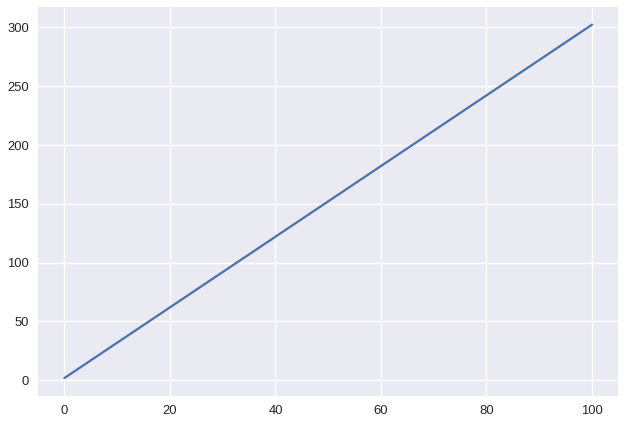

In [19]:
plot(x_train, y_train)

In [0]:
# Para hacer ajuste de la red vamos a usar Keras
# Keras es un API encima de tensor flow (y otros frameworks) que lo hace mas amigable, con los conceptos
# de alto nivel mas "académicos" 
from keras import models

In [0]:
from keras import layers

Se puede hacer cualquier flujo de datos con las capas, no tiene porque solo secuencial.
El 90-95% de los modelos son capas apiladas una después de la otra y es la que vamos a usar


In [0]:
m = models.Sequential()

El tamaño de las matrices y las capas es algo que hay que ir ensayando.
64 = una dimension de la matriz va a ser 64 y la otra se adapta según se necesite.
Para aprovechar la GPU, mejor que sea una potencia de 2.

Hay que decirle también la forma de entrada de los datos como una tupla. En este problema, solo tenemos (x,y), por lo que la forma es 1.

Hay que decirle también cómo va a ser la salida.

In [0]:
m.add(layers.Dense(64, input_shape=(1,))) # una capa densa es una matriz. Un tensor en realidad
m.add(layers.Dense(1))

In [50]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


Interesante ver que nos ha dado 193 variables cuando este problema se resuelve con 2 variables en regresión lineal ....
OJO, puede aprender tanto que puede crear overfitting

In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

la loss function es la parte mas delicada. En función del problema en cuestión, hay que investigar vien claro lo que neceistamos.
Para problemas de regresión siempre usamos errores medios.

También hay que pedirle las métricas para poder razonar conel problema. Por defecto siempre te reporta las métricas asociadas a la funcion de pérdidas que hemos elegido, por eso le hemos metido un array vacio.

Todo esto que le hemos metido, se le denomina parámetros o hiperparametros.
Si el resultado no es satisfactorio, modificamos los hiperparámetros.

In [0]:
m.compile(
    optimizer=optimizers.rmsprop(), # este es el gradiente descendiente estocástico tradicional
    loss=losses.mean_squared_error,
    metrics=[]
)

En la terminología de deep learning, cada pasada sobre los datos se llama época. Normalmente hará falta muchas épocas para llegar a donde queremos.

batch_size --> si es muy pequeño, ganamos en granularidad. No es sólo un tema de rendimiento, sino también por intentar reducir el factor de la aleatoriedad del optimizar y otras cosas que son "random."
Generalmente, lo mejor es ponerlo lo mas alto posible.

las variables epochs y batch_size están interrelacionadas. Si el tamaño del batch es muy pequeño, hará falta mas épocas.

In [53]:
h = m.fit(x_train, y_train, epochs=10, batch_size=8192, validation_split=.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 224us/step - loss: 18885.3320 - val_loss: 68579.5312
Epoch 2/10
800/800 [==============================] - 0s 12us/step - loss: 18163.2695 - val_loss: 66648.2422
Epoch 3/10
800/800 [==============================] - 0s 10us/step - loss: 17652.4590 - val_loss: 65058.0898
Epoch 4/10
800/800 [==============================] - 0s 12us/step - loss: 17231.8672 - val_loss: 63665.6289
Epoch 5/10
800/800 [==============================] - 0s 11us/step - loss: 16863.5547 - val_loss: 62404.6406
Epoch 6/10
800/800 [==============================] - 0s 9us/step - loss: 16530.0059 - val_loss: 61238.2695
Epoch 7/10
800/800 [==============================] - 0s 10us/step - loss: 16221.4854 - val_loss: 60143.6719
Epoch 8/10
800/800 [==============================] - 0s 10us/step - loss: 15931.9346 - val_loss: 59105.4961
Epoch 9/10
800/800 [==============================] - 0s 9us/step - loss: 15657.31

In [54]:
h = m.fit(x_train, y_train, epochs=10, batch_size=8192, validation_split=.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 15us/step - loss: 15142.1699 - val_loss: 56235.1445
Epoch 2/10
800/800 [==============================] - 0s 11us/step - loss: 14897.9814 - val_loss: 55339.2031
Epoch 3/10
800/800 [==============================] - 0s 12us/step - loss: 14660.9551 - val_loss: 54466.6953
Epoch 4/10
800/800 [==============================] - 0s 12us/step - loss: 14430.1250 - val_loss: 53614.6992
Epoch 5/10
800/800 [==============================] - 0s 12us/step - loss: 14204.7188 - val_loss: 52780.8438
Epoch 6/10
800/800 [==============================] - 0s 9us/step - loss: 13984.1035 - val_loss: 51963.1641
Epoch 7/10
800/800 [==============================] - 0s 9us/step - loss: 13767.7646 - val_loss: 51160.0156
Epoch 8/10
800/800 [==============================] - 0s 9us/step - loss: 13555.2627 - val_loss: 50369.9961
Epoch 9/10
800/800 [==============================] - 0s 9us/step - loss: 13346.2305 

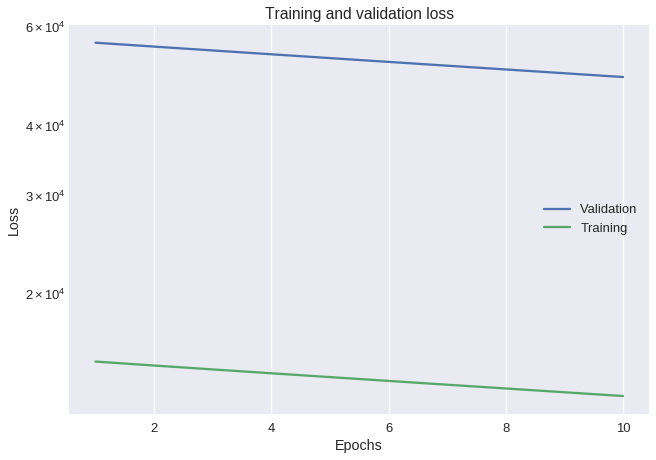

In [55]:
plot_metric(h, 'loss')

In [56]:

h = m.fit(x_train, y_train, epochs=170, batch_size=8192, validation_split=.2)

Train on 800 samples, validate on 200 samples
Epoch 1/170
800/800 [==============================] - 0s 12us/step - loss: 12937.3613 - val_loss: 48067.6094
Epoch 2/170
800/800 [==============================] - 0s 7us/step - loss: 12737.0127 - val_loss: 47319.7109
Epoch 3/170
800/800 [==============================] - 0s 7us/step - loss: 12539.1055 - val_loss: 46580.3750
Epoch 4/170
800/800 [==============================] - 0s 7us/step - loss: 12343.4629 - val_loss: 45849.0312
Epoch 5/170
800/800 [==============================] - 0s 7us/step - loss: 12149.9277 - val_loss: 45125.1758
Epoch 6/170
800/800 [==============================] - 0s 7us/step - loss: 11958.3672 - val_loss: 44408.3633
Epoch 7/170
800/800 [==============================] - 0s 8us/step - loss: 11768.6680 - val_loss: 43698.2109
Epoch 8/170
800/800 [==============================] - 0s 8us/step - loss: 11580.7246 - val_loss: 42994.3906
Epoch 9/170
800/800 [==============================] - 0s 8us/step - loss: 11394.

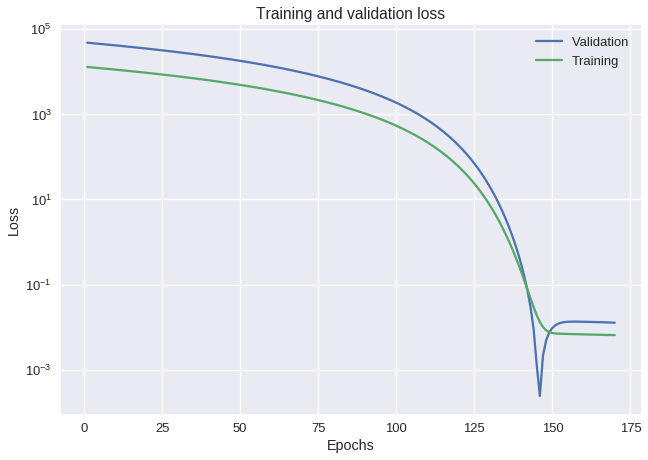

In [57]:
plot_metric(h, 'loss')

In [58]:
m.predict([70])

array([[212.0509]], dtype=float32)

In [60]:
3*70+2

212

In [0]:
y_pred = m.predict(x_train)


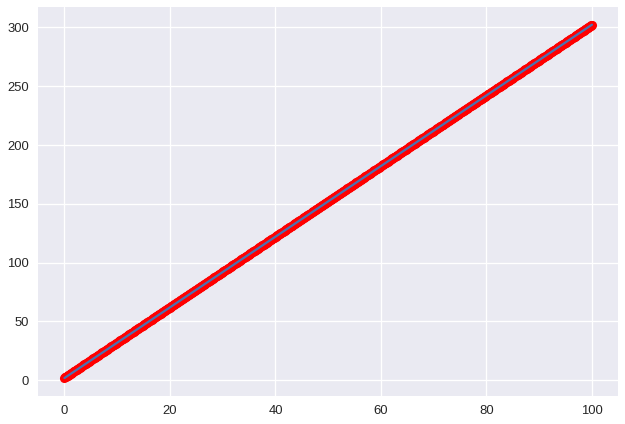

In [67]:
plt.plot(x_train,y_train, 'ro')
plt.plot(x_train,y_pred)



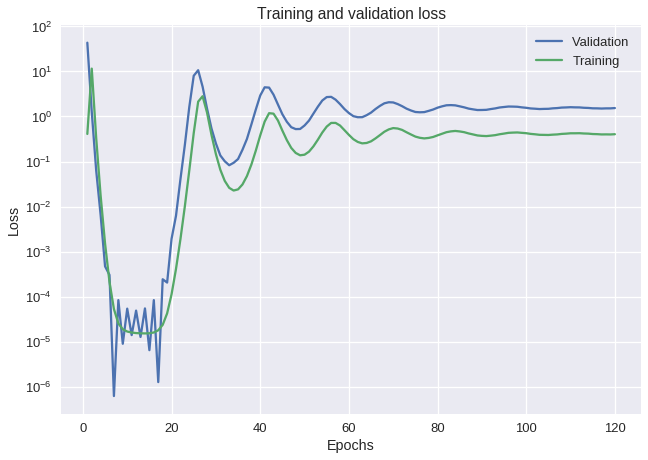

In [37]:
plot_metric(h, 'loss')

### Now another more complex function

Let's try to fit a parabollic function

$\displaystyle y = -2x^2 + x + 1$

In [0]:
x_train = np.linspace(-100, 100, 1000)
y_train = -2*x_train**2 + x_train + 1

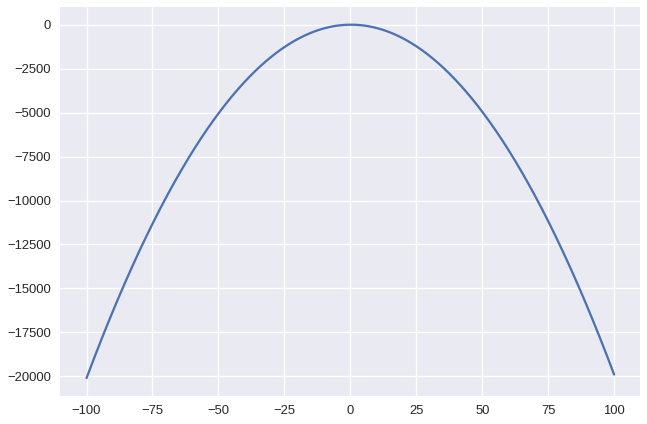

In [72]:
plt.plot(x_train, y_train)

In [78]:
m = models.Sequential()
m.add(layers.Dense(128, input_shape=(1,)))
m.add(layers.Dense(64))
m.add(layers.Dense(1))
m.compile(optimizer=optimizers.rmsprop(), loss=losses.mean_squared_error, metrics=[])
h = m.fit(x_train, y_train, epochs=1000, batch_size=8192, validation_split=.2)


Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 0s 318us/step - loss: 54908584.0000 - val_loss: 182968080.0000
Epoch 2/1000
800/800 [==============================] - 0s 10us/step - loss: 54644880.0000 - val_loss: 183714144.0000
Epoch 3/1000
800/800 [==============================] - 0s 9us/step - loss: 54455000.0000 - val_loss: 184356560.0000
Epoch 4/1000
800/800 [==============================] - 0s 9us/step - loss: 54292228.0000 - val_loss: 184947952.0000
Epoch 5/1000
800/800 [==============================] - 0s 8us/step - loss: 54142988.0000 - val_loss: 185512064.0000
Epoch 6/1000
800/800 [==============================] - 0s 10us/step - loss: 54001152.0000 - val_loss: 186061888.0000
Epoch 7/1000
800/800 [==============================] - 0s 9us/step - loss: 53863392.0000 - val_loss: 186605616.0000
Epoch 8/1000
800/800 [==============================] - 0s 9us/step - loss: 53727616.0000 - val_loss: 187148784.0000
Epoch 9/1000
8

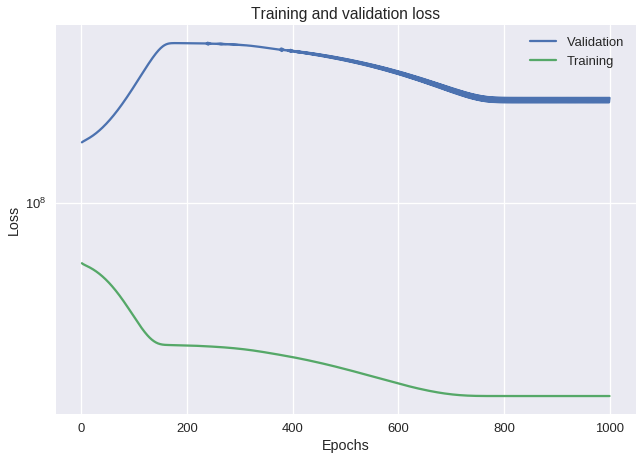

In [79]:
plot_metric(h, 'loss')

In [77]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


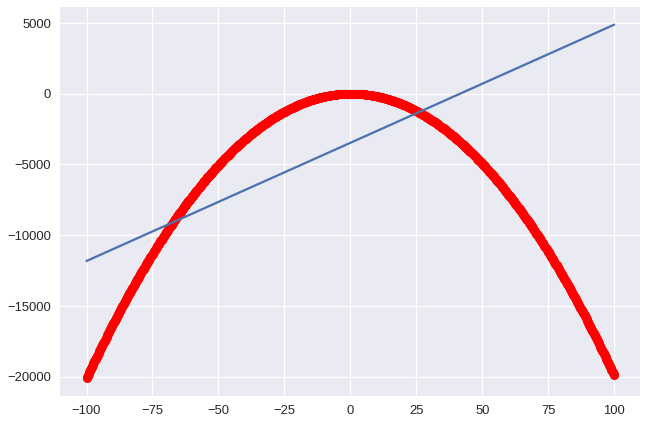

In [82]:
y_pred = m.predict(x_train)
plt.plot(x_train, y_train, "ro")
plt.plot(x_train, y_pred)

Una red neuronal solo puede predecir funciones lineales a no ser que le metamos funciones de activación, xq sino las redes no son mas que operaciones matriciales (lineales)

Funcion RELU. <0 lo quita, >0 lo deja pasar

In [99]:
m = models.Sequential()
m.add(layers.Dense(64, input_shape=(1,), activation='relu'))
m.add(layers.Dense(64, input_shape=(1,), activation='relu'))
m.add(layers.Dense(64, activation='relu'))
m.add(layers.Dense(64, activation='relu'))
m.add(layers.Dense(1))
m.compile(optimizer=optimizers.rmsprop(), loss=losses.mean_squared_error, metrics=[])
h = m.fit(x_train, y_train, epochs=150, batch_size=8192, validation_split=.2)

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 0s 567us/step - loss: 54686312.0000 - val_loss: 182724112.0000
Epoch 2/150
800/800 [==============================] - 0s 14us/step - loss: 54635772.0000 - val_loss: 182573488.0000
Epoch 3/150
800/800 [==============================] - 0s 12us/step - loss: 54592808.0000 - val_loss: 182434320.0000
Epoch 4/150
800/800 [==============================] - 0s 13us/step - loss: 54553164.0000 - val_loss: 182263872.0000
Epoch 5/150
800/800 [==============================] - 0s 14us/step - loss: 54512456.0000 - val_loss: 182090016.0000
Epoch 6/150
800/800 [==============================] - 0s 12us/step - loss: 54468292.0000 - val_loss: 181904512.0000
Epoch 7/150
800/800 [==============================] - 0s 12us/step - loss: 54421812.0000 - val_loss: 181689488.0000
Epoch 8/150
800/800 [==============================] - 0s 12us/step - loss: 54370324.0000 - val_loss: 181464992.0000
Epoch 9/150
800/8

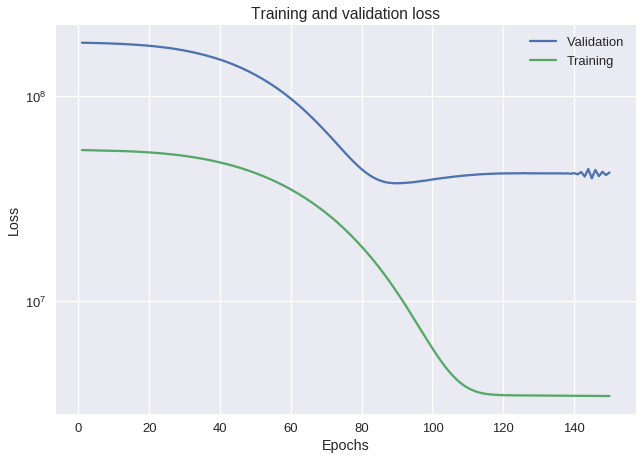

In [100]:
plot_metric(h, 'loss')

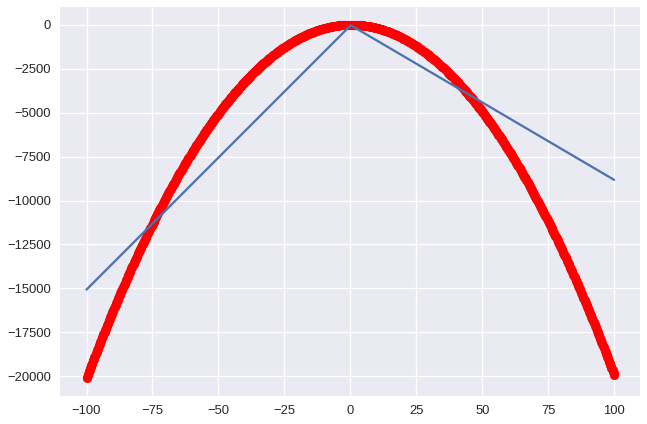

In [101]:
y_pred = m.predict(x_train)
plt.plot(x_train, y_train, "ro")
plt.plot(x_train, y_pred)

Normalizar los datos tambine ayuda bastante. Tendríamos que normalizar en la entrada y normalizar a la inversa en la salida

### And now even a more complex one

Let's try to predict now this function:

$\displaystyle y = \cos(x)$